# Sparsity evaluation on different distributions

In [10]:
import numpy as np
from experiments.plot_sparsity import plot_sparsity

In [30]:
# first we define the experimental setup

# random graph parameters
T = 1000 # total number of timesteps 
d = 10 # number of nodes of the graph
n = 100 # number of data samples = number of individual time-sequences 
sparsity =  0.05
threshold = 0.1


In [31]:
# Bernoulli & Uniform distribution
pos = np.random.choice([0, 1], size=(n * d * T), p=[1 - sparsity, sparsity]) 
sign = np.random.choice([-1, 1], size=(n * d * T)) 
C_bernoulli = pos * np.random.uniform(0.1, 0.4, size=(n * d * T))  * sign

std = threshold / 3
Nf = np.random.normal(scale=std, size=(n * d * T))
C_bernoulli = C_bernoulli + Nf

# Gauss distribution
sigma = 0.051
C_gauss = np.random.normal(scale=sigma, size=(n * d * T))

# Laplace distribution
beta = threshold / 3
C_laplace = np.random.laplace(loc=0, scale=beta, size=(n * d * T))

## Population with regard to the threshold 

In [32]:
all = n * T * d 

print("Sparsity measure Bernoulli")
print("{:.4f} of values are less than {:.2f}".format(np.where(np.abs(C_bernoulli) < threshold, 1, 0).sum() / all, threshold))
print("{:.4f} of values are greater than {:.2f}".format(np.where(np.abs(C_bernoulli) > threshold, 1, 0).sum() / all, threshold))
print("{:.4f} of values are greater than {:.2f}".format(np.where(np.abs(C_bernoulli) > 1.5 * threshold, 1, 0).sum() / all, 1.5 * threshold))
print("{:.4f} of values are greater than {:.2f}\n".format(np.where(np.abs(C_bernoulli) > 2 * threshold, 1, 0).sum() / all, 2 * threshold))

print("Sparsity measure Gauss")
print("{:.4f} of values are less than {:.2f}".format(np.where(np.abs(C_gauss) < threshold, 1, 0).sum() / all, threshold))
print("{:.4f} of values are greater than {:.2f}".format(np.where(np.abs(C_gauss) > threshold, 1, 0).sum() / all, threshold))
print("{:.4f} of values are greater than {:.2f}".format(np.where(np.abs(C_gauss) > 1.5 * threshold, 1, 0).sum() / all, 1.5 * threshold))
print("{:.4f} of values are greater than {:.2f}\n".format(np.where(np.abs(C_gauss) > 2 * threshold, 1, 0).sum() / all, 2 * threshold))

print("Sparsity measure Laplace")
print("{:.4f} of values are less than {:.2f}".format(np.where(np.abs(C_laplace) < threshold, 1, 0).sum() / all, threshold))
print("{:.4f} of values are greater than {:.2f}".format(np.where(np.abs(C_laplace) > threshold, 1, 0).sum() / all, threshold))
print("{:.4f} of values are greater than {:.2f}".format(np.where(np.abs(C_laplace) > 1.5 * threshold, 1, 0).sum() / all, 1.5 * threshold))
print("{:.4f} of values are greater than {:.2f}".format(np.where(np.abs(C_laplace) > 2 * threshold, 1, 0).sum() / all, 2 * threshold))

Sparsity measure Bernoulli
0.9501 of values are less than 0.10
0.0499 of values are greater than 0.10
0.0409 of values are greater than 0.15
0.0329 of values are greater than 0.20

Sparsity measure Gauss
0.9503 of values are less than 0.10
0.0497 of values are greater than 0.10
0.0032 of values are greater than 0.15
0.0001 of values are greater than 0.20

Sparsity measure Laplace
0.9502 of values are less than 0.10
0.0498 of values are greater than 0.10
0.0111 of values are greater than 0.15
0.0025 of values are greater than 0.20


<Figure size 640x480 with 0 Axes>

findfont: Font family 'gillsans' not found.
findfont: Font family 'gillsans' not found.
findfont: Font family 'gillsans' not found.
findfont: Font family 'gillsans' not found.
findfont: Font family 'gillsans' not found.
findfont: Font family 'gillsans' not found.
findfont: Font family 'gillsans' not found.
findfont: Font family 'gillsans' not found.
findfont: Font family 'gillsans' not found.
findfont: Font family 'gillsans' not found.
findfont: Font family 'gillsans' not found.
findfont: Font family 'gillsans' not found.
findfont: Font family 'gillsans' not found.
findfont: Font family 'gillsans' not found.
findfont: Font family 'gillsans' not found.
findfont: Font family 'gillsans' not found.
findfont: Font family 'gillsans' not found.
findfont: Font family 'gillsans' not found.
findfont: Font family 'gillsans' not found.
findfont: Font family 'gillsans' not found.
findfont: Font family 'gillsans' not found.
findfont: Font family 'gillsans' not found.
findfont: Font family 'gillsans'

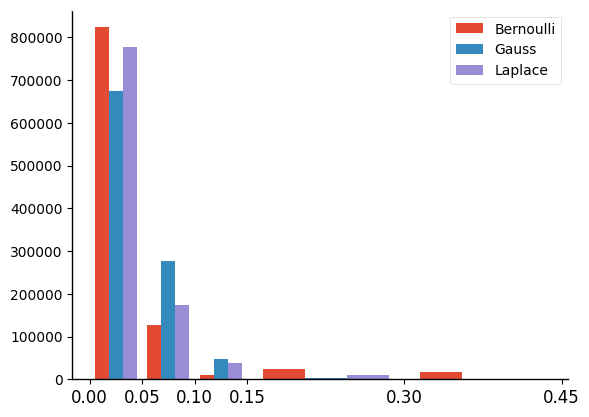

In [33]:
plot_sparsity(C_bernoulli, C_gauss, C_laplace, threshold)

## Maximum Value

In [34]:
print("Max value for Bernoulli is {:.2f}".format(np.abs(C_bernoulli).max()))
print("Max value for Gauss is {:.2f}".format(np.abs(C_gauss).max()))
print("Max value for Laplace is {:.2f}".format(np.abs(C_laplace).max()))

Max value for Bernoulli is 0.51
Max value for Gauss is 0.28
Max value for Laplace is 0.53


## Contrast ratio

In [35]:
def contrast_ratio(random_vector, eps):
    sum_of_nonzero = np.where(np.abs(random_vector) > eps, np.abs(random_vector), 0).sum()
    num_of_nonzero = np.where(np.abs(random_vector) > eps, 1, 0).sum()

    return sum_of_nonzero / (num_of_nonzero * eps)

print("Constrast ratio for Bernoulli is {:.2f}".format(contrast_ratio(C_bernoulli, threshold)))
print("Constrast ratio for Gauss is {:.2f}".format(contrast_ratio(C_gauss, threshold)))
print("Constrast ratio for Laplace is {:.2f}".format(contrast_ratio(C_laplace, threshold)))

Constrast ratio for Bernoulli is 2.50
Constrast ratio for Gauss is 1.19
Constrast ratio for Laplace is 1.33


## SNR

In [36]:
def SNR(random_vector, eps, DB=False):
    signal_power = np.where(np.abs(random_vector) > eps, np.abs(random_vector) ** 2, 0).sum()
    noise_power = np.where(np.abs(random_vector) < eps, np.abs(random_vector) ** 2, 0).sum()

    if DB:
        return 10 * np.log10(signal_power / noise_power)
    
    return signal_power / noise_power

print("SNR for Bernoulli is {:.2f}".format(SNR(C_bernoulli, threshold)))
print("SNR for Gauss is {:.2f}".format(SNR(C_gauss, threshold)))
print("SNR for Laplace is {:.2f}".format(SNR(C_laplace, threshold)))

SNR for Bernoulli is 3.40
SNR for Gauss is 0.38
SNR for Laplace is 0.73
